## John Austin Smith
"On my honor, as a student, I have neither given
nor received unauthorized aid on this academic work."

In [1656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats
from pandas.tools import plotting

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Data Retrieval

In [1657]:
df=pd.read_excel("train_test_dataset.xlsx") # retrieving and displaying the first 5 rows
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [1658]:
df.info() # discovering the columns variable types and how many variables are filled in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [1659]:
df.isnull().sum() # Checking how many variables are null

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [1660]:
df.mean() # finding the mean of each column

Y2defect      0.500000
Y1G5          0.337023
Y1G4          0.510525
Y1G3          0.636719
Y1G2          0.291124
Y1G1          0.480252
Y1price      19.963108
YEARS         6.378038
BACKER        0.489475
SPORT         0.056869
PCTMARR      58.228516
HOMEVAL     112.111220
dtype: float64

## Data Cleaning and Processing

In [1661]:
df = df.drop(['CHILD','SPORT','COMP','OWNHOME'], axis = 1) # dropping the columns that will not be useful to us

In [1662]:
df.isnull().sum() # checking nulls again

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [1663]:
c = 0 # changing any wrongly inputed variables to nulls
for i in df.AGE:
    if type(i) != int:
        i = None
    df.loc[c,'AGE'] = i
    c = c + 1

In [1664]:
c = 0 # changing any wrongly inputed variables to nulls
for i in df.INCOME:
    if type(i) != int:
        i = None
    df.loc[c,'INCOME'] = i
    c = c + 1

In [1665]:
c = 0 # changing any wrongly inputed variables to nulls
for i in df.GNDR:
    if type(i) != int:
        i = None
    df.loc[c,'GNDR'] = i
    c = c + 1

In [1666]:
df = df.dropna(how='any') # drop any rows will null variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      6214 non-null object
Y2defect    6214 non-null int64
Y1G5        6214 non-null int64
Y1G4        6214 non-null int64
Y1G3        6214 non-null int64
Y1G2        6214 non-null int64
Y1G1        6214 non-null int64
Y1price     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null object
INCOME      6214 non-null object
GNDR        6214 non-null object
PCTMARR     6214 non-null int64
HOMEVAL     6214 non-null int64
dtypes: int64(11), object(4)
memory usage: 776.8+ KB


In [1667]:
df['AGE'] = df['AGE'].astype(int) # changing variable type to int

In [1668]:
df['INCOME'] = df['INCOME'].astype(int) # changing variable type to int

In [1669]:
df['GNDR'] = df['GNDR'].astype(int) # changing variable type to int

In [1670]:
df.AGE.mean() # checking the mean of age

61.12101705825555

In [1671]:
df.INCOME.mean() # checking the mean of income

2.9391696169938846

In [1672]:
df.groupby('GNDR').count() # counting the difference between males and females

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
GNDR,,,,,,,,,,,,,,
0,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351
1,2863,2863,2863,2863,2863,2863,2863,2863,2863,2863,2863,2863,2863,2863


c = 0
for i in df.AGE:
    if i == None:
        i = 61
    df.loc[c,'AGE'] = i
    c = c + 1

c = 0
for i in df.INCOME:
    if i == None:
        i = 3
    df.loc[c,'INCOME'] = i
    c = c + 1

c = 0
for i in df.GNDR:
    if i == None:
        i = 0
    df.loc[c,'GNDR'] = i
    c = c + 1

In [1673]:
df.isnull().sum() # checking nulls again

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [1674]:
df.info() # checking to see if our changes were implemented

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      6214 non-null object
Y2defect    6214 non-null int64
Y1G5        6214 non-null int64
Y1G4        6214 non-null int64
Y1G3        6214 non-null int64
Y1G2        6214 non-null int64
Y1G1        6214 non-null int64
Y1price     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null int32
INCOME      6214 non-null int32
GNDR        6214 non-null int32
PCTMARR     6214 non-null int64
HOMEVAL     6214 non-null int64
dtypes: int32(3), int64(11), object(1)
memory usage: 703.9+ KB


## Model Building and Development

Y2defect
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

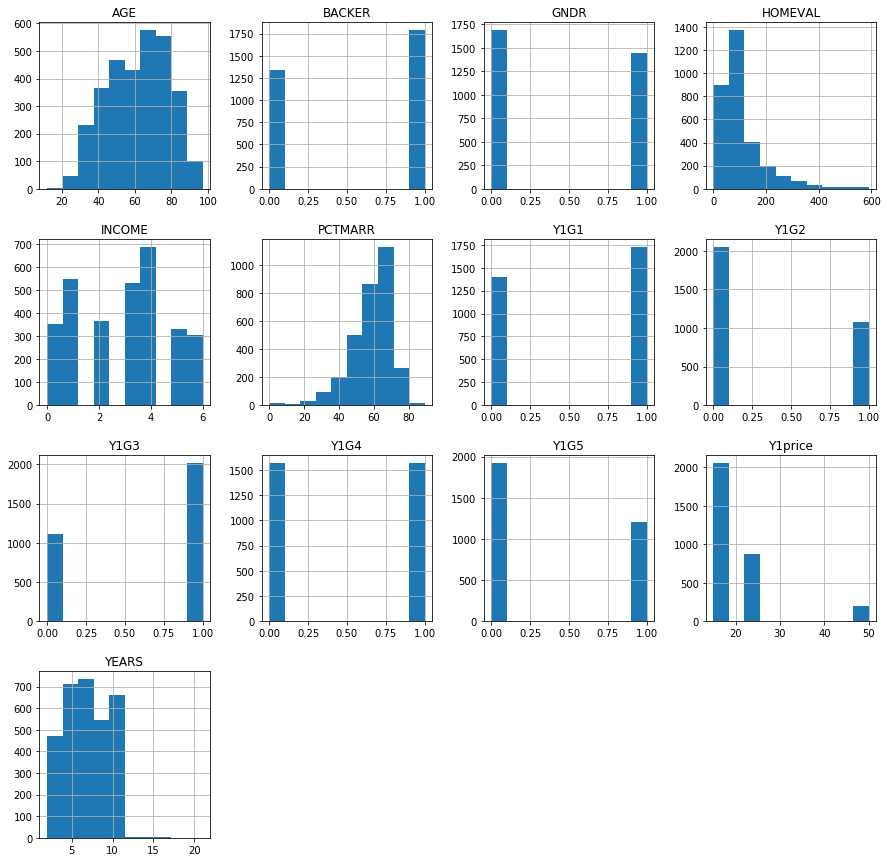

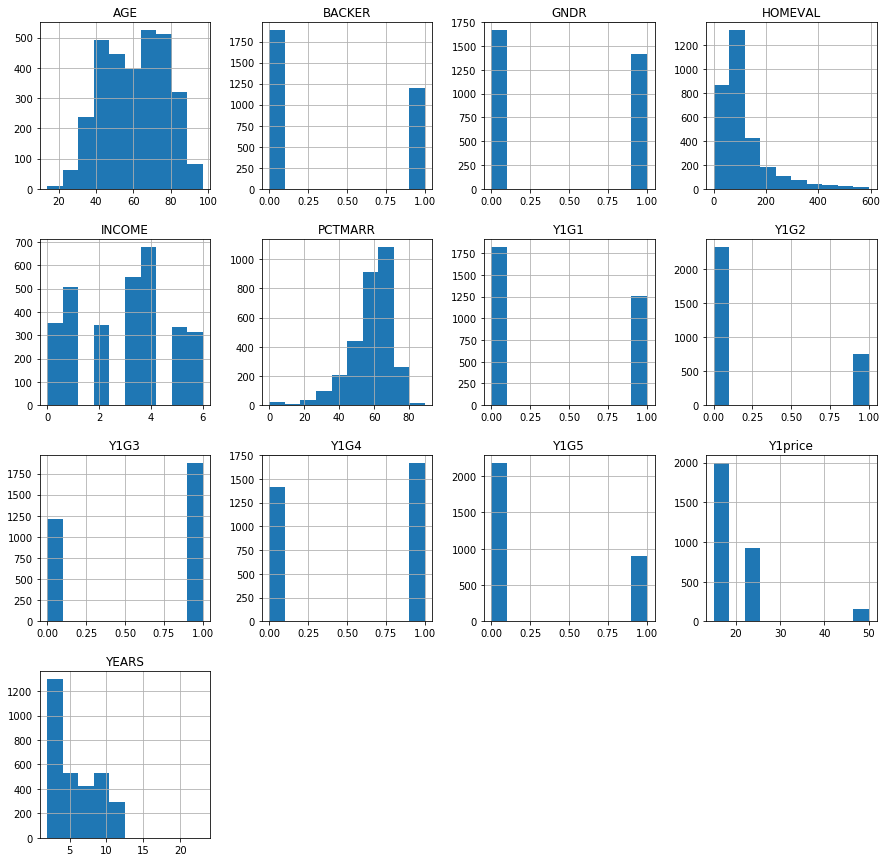

In [1675]:
df.groupby('Y2defect').hist(figsize=(15,15)) # creating histograms to see the difference between 
                                             # renewed and not renewed ticket holders

In [1676]:
y = df['Y2defect'] # selecting y2defect as y
X = df.drop(['Y2defect','FAKEID','HOMEVAL','PCTMARR','GNDR','AGE','INCOME','Y1price','YEARS','BACKER'],axis=1) # selecting the variables to drop
X.info() # showing the variables used for X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 5 columns):
Y1G5    6214 non-null int64
Y1G4    6214 non-null int64
Y1G3    6214 non-null int64
Y1G2    6214 non-null int64
Y1G1    6214 non-null int64
dtypes: int64(5)
memory usage: 291.3 KB


In [1677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) # testing

In [1678]:
dt = DecisionTreeClassifier() # creating decsision tree
dt.fit(X_train, y_train) # fitting

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1679]:
print metrics.accuracy_score(y_test, dt.predict(X_test)) # displaying results
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5999356292243322
[[1034  531]
 [ 712  830]]
             precision    recall  f1-score   support

          0       0.59      0.66      0.62      1565
          1       0.61      0.54      0.57      1542

avg / total       0.60      0.60      0.60      3107

0.5994824364026636


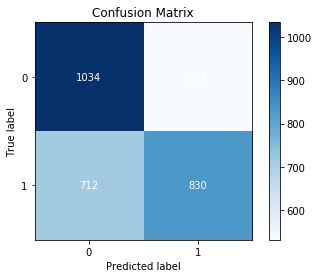

In [1680]:
import scikitplot as skplt # displaying results in a form that makes more sense.

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [1681]:
tree.export_graphviz(dt, out_file='decision.dot', feature_names=X.columns) # exporting to graphviz

In [1682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # simplifying decision tree
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1683]:
# Find out the performance of this model & interpret the results
print metrics.accuracy_score(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_simple.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt_simple.predict(X_test))

0.588739946380697
--------------------------------------------------------
[[613 324]
 [443 485]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.65      0.62       937
          1       0.60      0.52      0.56       928

avg / total       0.59      0.59      0.59      1865

--------------------------------------------------------
0.5884224459941855


In [1684]:
tree.export_graphviz(dt_simple, out_file='decision_simple.dot', feature_names=X.columns) #exporting to graphviz

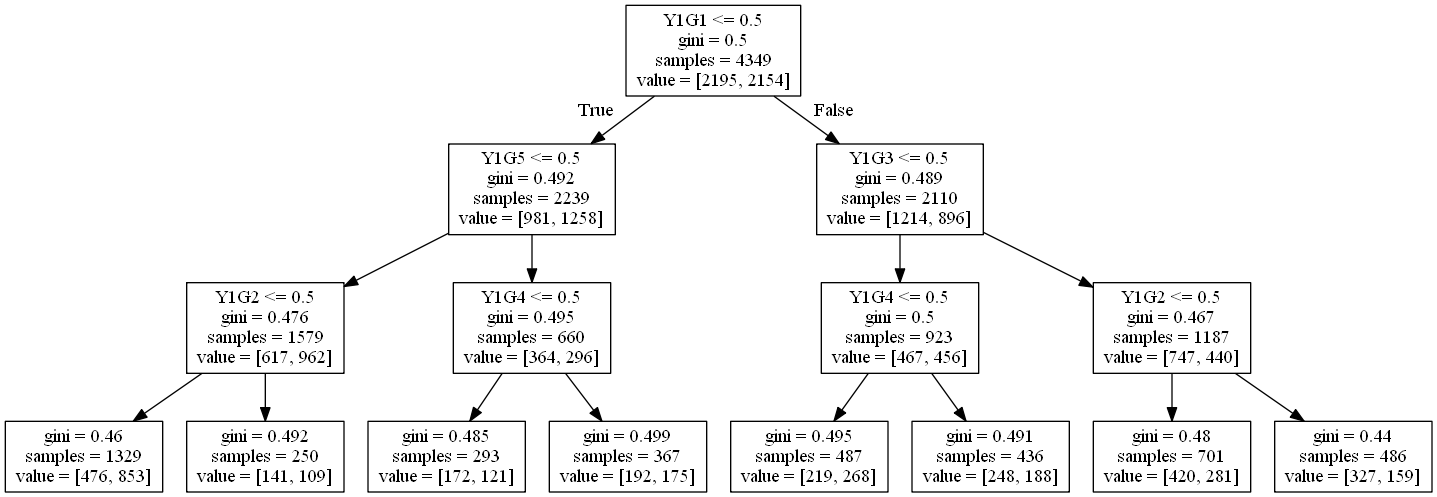

In [1685]:
from IPython.display import Image # displaying the simplified decision tree
Image("decision_simple.png")

### Fixing Validation

In [1686]:
df1 = pd.read_excel("validation_dataset.xlsx") # retrieving validation set
df1.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [1687]:
df1.info() # discovering the columns variable types and how many variables are filled in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      9542 non-null object
CHILD       4810 non-null object
GNDR        9542 non-null object
OWNHOME     9542 non-null object
SPORT       4180 non-null float64
COMP        9542 non-null object
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(3), int64(10), object(6)
memory usage: 1.4+ MB


In [1688]:
df1 = df1.drop(['Y3defect','CHILD','SPORT','COMP','OWNHOME'], axis = 1) # dropping usless columns

In [1689]:
df1.isnull().sum() # checking nulls

FAKEID        0
Y2G5          0
Y2G4          0
Y2G3          0
Y2G2          0
Y2G1          0
Y2price       0
YEARS         0
BACKER        0
AGE        2487
INCOME        0
GNDR          0
PCTMARR       0
HOMEVAL       0
dtype: int64

In [1690]:
c = 0 # changing any wrongly inputed variables to nulls
for i in df1.AGE:
    if type(i) != float:
        i = None
    df1.loc[c,'AGE'] = i
    c = c + 1

In [1691]:
c = 0 # changing any wrongly inputed variables to nulls
for i in df1.INCOME:
    if type(i) != int:
        i = None
    df1.loc[c,'INCOME'] = i
    c = c + 1

In [1692]:
c = 0 # changing any wrongly inputed variables to nulls
for i in df1.GNDR:
    if type(i) != int:
        i = None
    df1.loc[c,'GNDR'] = i
    c = c + 1

In [1693]:
df1.AGE.mean() #checking validations age mean

62.11141034727144

In [1694]:
df1.INCOME.mean() # checking validations income mean

2.879332117300407

In [1695]:
df1.groupby('GNDR').count() # checking how many males and females are in the dataset

,FAKEID,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,PCTMARR,HOMEVAL
GNDR,,,,,,,,,,,,,
0,5117,5117,5117,5117,5117,5117,5117,5117,5117,3795,3869,5117,5117
1,3860,3860,3860,3860,3860,3860,3860,3860,3860,3024,3063,3860,3860


c = 0
for i in df1.AGE:
    if i == None:
        i = 62
    df1.loc[c,'AGE'] = i
    c = c + 1

In [1696]:
df1 = df1.dropna(how='any') # dropping all nulls
df1.info() # checking if data is clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6043 entries, 0 to 9541
Data columns (total 14 columns):
FAKEID     6043 non-null object
Y2G5       6043 non-null int64
Y2G4       6043 non-null int64
Y2G3       6043 non-null int64
Y2G2       6043 non-null int64
Y2G1       6043 non-null int64
Y2price    6043 non-null int64
YEARS      6043 non-null int64
BACKER     6043 non-null int64
AGE        6043 non-null float64
INCOME     6043 non-null object
GNDR       6043 non-null object
PCTMARR    6043 non-null int64
HOMEVAL    6043 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 708.2+ KB


In [1697]:
df1['AGE'] = df1['AGE'].astype(int) # changing variable type to int
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6043 entries, 0 to 9541
Data columns (total 14 columns):
FAKEID     6043 non-null object
Y2G5       6043 non-null int64
Y2G4       6043 non-null int64
Y2G3       6043 non-null int64
Y2G2       6043 non-null int64
Y2G1       6043 non-null int64
Y2price    6043 non-null int64
YEARS      6043 non-null int64
BACKER     6043 non-null int64
AGE        6043 non-null int32
INCOME     6043 non-null object
GNDR       6043 non-null object
PCTMARR    6043 non-null int64
HOMEVAL    6043 non-null int64
dtypes: int32(1), int64(10), object(3)
memory usage: 684.6+ KB


In [1698]:
df1.isnull().sum() # checking nulls

FAKEID     0
Y2G5       0
Y2G4       0
Y2G3       0
Y2G2       0
Y2G1       0
Y2price    0
YEARS      0
BACKER     0
AGE        0
INCOME     0
GNDR       0
PCTMARR    0
HOMEVAL    0
dtype: int64

In [1699]:
df1.head() # displaying first 5 rows

,FAKEID,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL
0,580D24RR,0,0,1,1,0,15,5,0,49,4,0,66,64
1,179Q96NO,1,1,1,1,1,25,9,1,84,5,0,67,128
3,399V18KY,0,0,1,1,0,15,1,0,34,4,0,65,81
4,009A52KP,0,1,0,1,0,25,9,1,59,4,1,65,110
5,059D43VJ,0,0,0,0,1,15,1,0,69,6,0,69,192


## Model Deployment & Prepare Entry Data

In [1700]:
validation = df1.drop(['FAKEID','HOMEVAL','PCTMARR','GNDR','AGE','INCOME','Y2price','YEARS','BACKER'],axis=1) # dropping columns
validation.info() # showing what columns will be used for test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6043 entries, 0 to 9541
Data columns (total 5 columns):
Y2G5    6043 non-null int64
Y2G4    6043 non-null int64
Y2G3    6043 non-null int64
Y2G2    6043 non-null int64
Y2G1    6043 non-null int64
dtypes: int64(5)
memory usage: 283.3 KB


In [1701]:
fakeid = pd.DataFrame(df1['FAKEID']) # making new dataframe
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
3,399V18KY
4,009A52KP
5,059D43VJ


In [1702]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry1.csv", index=False)

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000BDE2CCC0>,
      dtype=object)

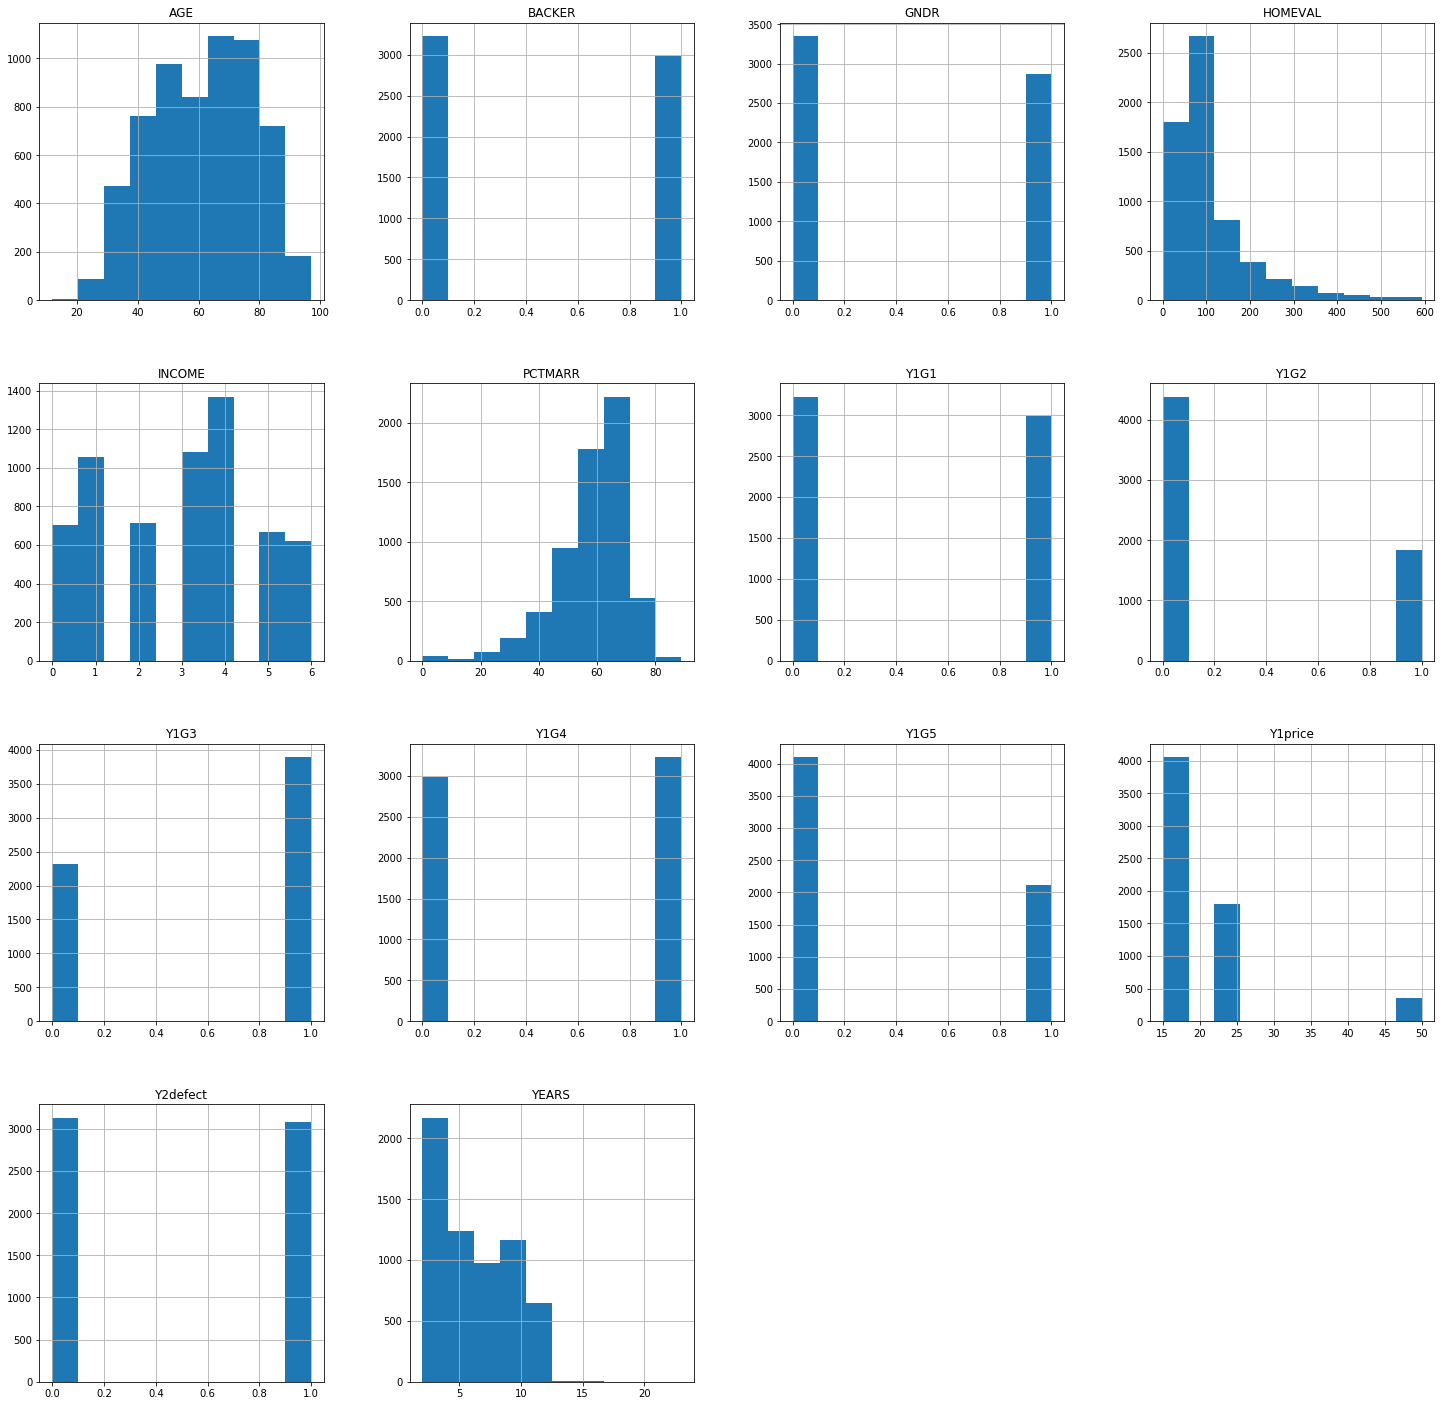

In [1703]:
df.hist(figsize=(25,25)) # displaying histograms

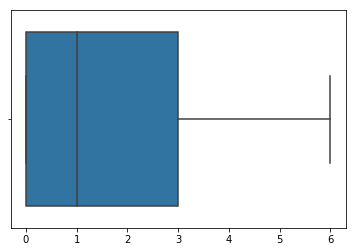

In [1704]:
sns.boxplot([df.Y2defect, df.INCOME]) # created boxplot to compare defects to income

In [1705]:
df.groupby(['Y2defect']).count() # checked non renewals to renewals

,FAKEID,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,,,,
0,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132
1,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082


In [1706]:
df.info() # checked how much data is left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      6214 non-null object
Y2defect    6214 non-null int64
Y1G5        6214 non-null int64
Y1G4        6214 non-null int64
Y1G3        6214 non-null int64
Y1G2        6214 non-null int64
Y1G1        6214 non-null int64
Y1price     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null int32
INCOME      6214 non-null int32
GNDR        6214 non-null int32
PCTMARR     6214 non-null int64
HOMEVAL     6214 non-null int64
dtypes: int32(3), int64(11), object(1)
memory usage: 863.9+ KB


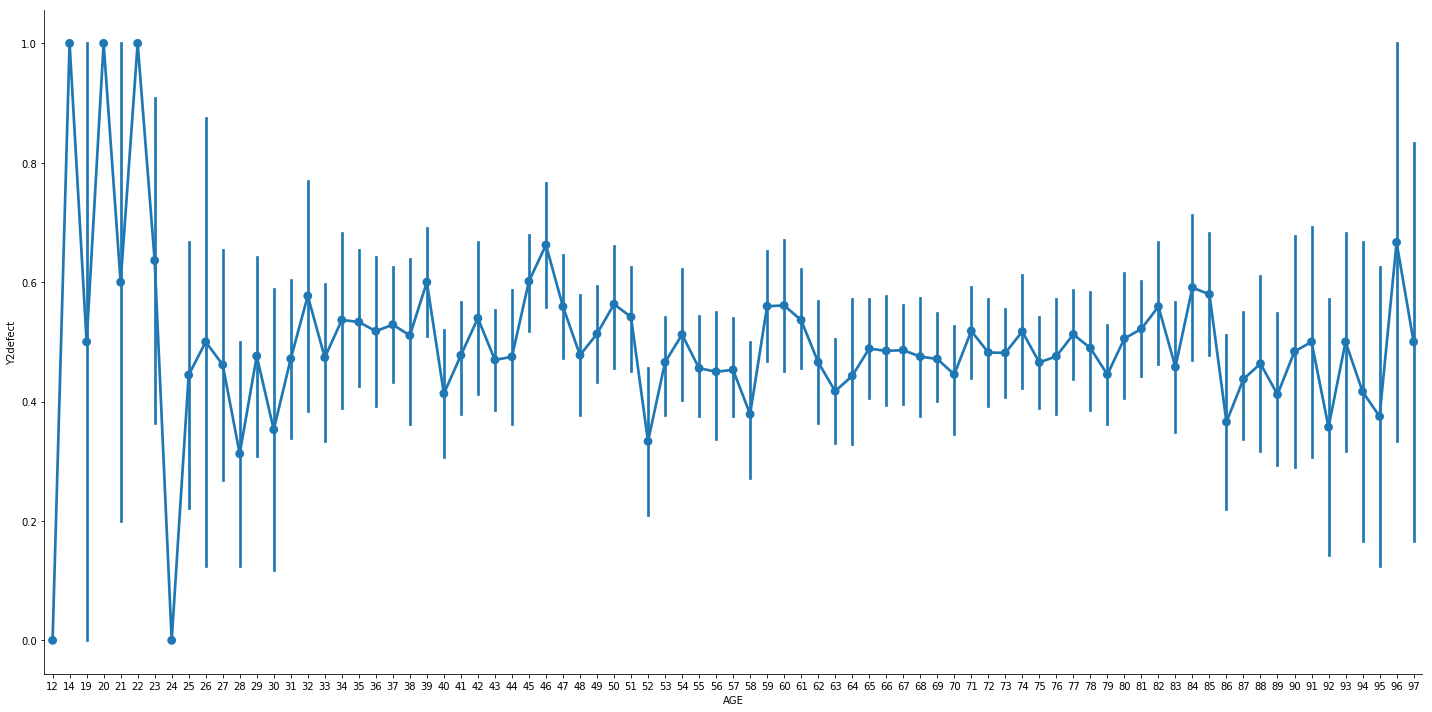

In [1707]:
sns.factorplot("AGE","Y2defect", data=df, size = 10, aspect = 2) # created factorplot comparing age to defecting

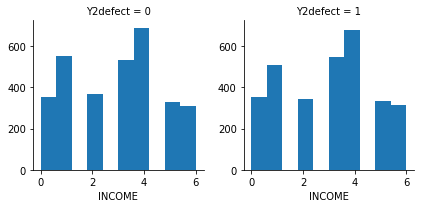

In [1708]:
g = sns.FacetGrid(df,col="Y2defect") # created a facetgrid
g.map(plt.hist,"INCOME") # developed a histogram from previously created facetgrid

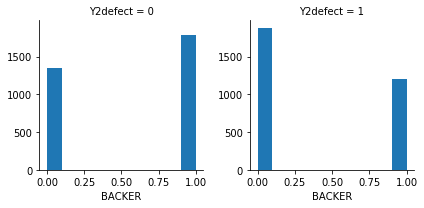

In [1709]:
g = sns.FacetGrid(df,col="Y2defect") # created a facetgrid
g.map(plt.hist,"BACKER") # developed a histogram from previously created facetgrid

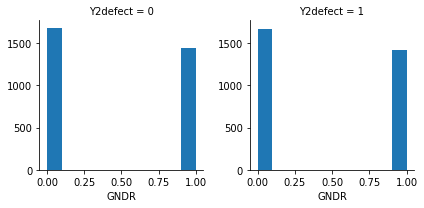

In [1710]:
g = sns.FacetGrid(df,col="Y2defect") # created a facetgrid
g.map(plt.hist,"GNDR") # developed a histogram from previously created facetgrid

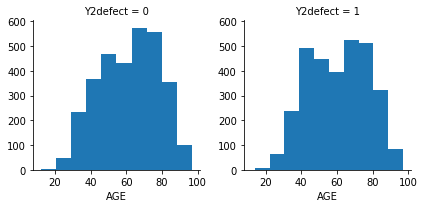

In [1711]:
g = sns.FacetGrid(df,col="Y2defect") # created a facetgrid
g.map(plt.hist,"AGE") # developed a histogram from previously created facetgrid

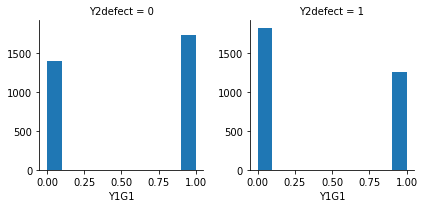

In [1712]:
g = sns.FacetGrid(df,col="Y2defect") # created a facetgrid
g.map(plt.hist,"Y1G1") # developed a histogram from previously created facetgrid

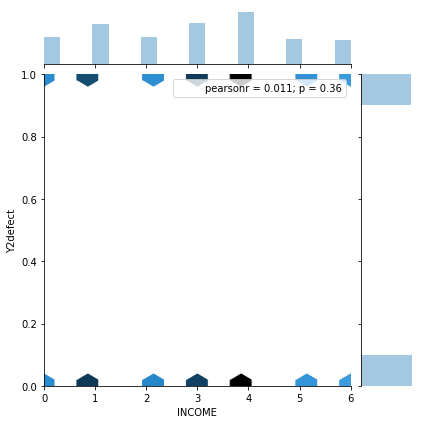

In [1713]:
sns.jointplot(x="INCOME", y="Y2defect",data=df,kind="hex") # displayed a jointplot comparing income to defects

## Exploratory/Statistical Data Analysis

In [1714]:
df.corr() # checking correlation between all columns

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.097838,0.041228,-0.037153,-0.109527,-0.144940,-0.011480,-0.127372,-0.181988,-0.020781,0.011495,-0.002571,-0.011746,0.035777
Y1G5,-0.097838,1.000000,0.077973,-0.138184,0.110573,0.113307,0.050667,0.115901,0.048945,0.036118,0.007881,0.011224,0.004610,0.010098
Y1G4,0.041228,0.077973,1.000000,-0.081608,-0.074006,-0.108378,0.015202,-0.085548,-0.080321,-0.074335,0.015545,0.016045,0.009845,0.005004
Y1G3,-0.037153,-0.138184,-0.081608,1.000000,-0.088371,-0.134965,-0.053506,-0.099307,0.000620,-0.027872,0.016659,-0.011104,-0.005857,-0.002819
Y1G2,-0.109527,0.110573,-0.074006,-0.088371,1.000000,0.194404,0.056031,0.315991,0.280105,0.102732,-0.012826,0.005238,0.017550,-0.007517
Y1G1,-0.144940,0.113307,-0.108378,-0.134965,0.194404,1.000000,-0.004132,0.233132,0.251188,0.086935,-0.035374,-0.020517,0.033509,-0.008161
Y1price,-0.011480,0.050667,0.015202,-0.053506,0.056031,-0.004132,1.000000,0.037318,-0.097641,-0.038765,0.076975,0.050314,-0.011971,0.088744
YEARS,-0.127372,0.115901,-0.085548,-0.099307,0.315991,0.233132,0.037318,1.000000,0.527847,0.317249,-0.093972,0.002046,0.006448,-0.030175
BACKER,-0.181988,0.048945,-0.080321,0.000620,0.280105,0.251188,-0.097641,0.527847,1.000000,0.200165,-0.092481,-0.010527,0.028137,-0.075744
AGE,-0.020781,0.036118,-0.074335,-0.027872,0.102732,0.086935,-0.038765,0.317249,0.200165,1.000000,-0.249764,0.019354,-0.058039,-0.010251


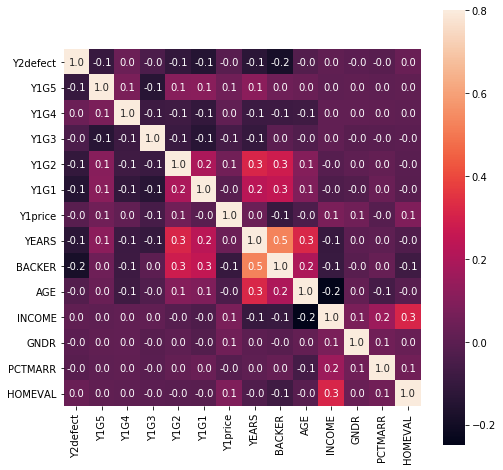

In [1715]:
# correlation plot

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [1716]:
df[['YEARS','BACKER']].corr() # displaying correlation between years and backers

,YEARS,BACKER
YEARS,1.000000,0.527847
BACKER,0.527847,1.000000


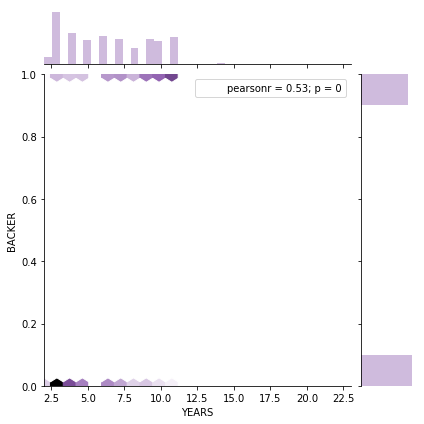

In [1717]:
sns.jointplot("YEARS", "BACKER", df, kind="hex", color="#8855AA") # displayed a joint plot between years and backers

In [1718]:
df.corr() # checking correlation

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.097838,0.041228,-0.037153,-0.109527,-0.144940,-0.011480,-0.127372,-0.181988,-0.020781,0.011495,-0.002571,-0.011746,0.035777
Y1G5,-0.097838,1.000000,0.077973,-0.138184,0.110573,0.113307,0.050667,0.115901,0.048945,0.036118,0.007881,0.011224,0.004610,0.010098
Y1G4,0.041228,0.077973,1.000000,-0.081608,-0.074006,-0.108378,0.015202,-0.085548,-0.080321,-0.074335,0.015545,0.016045,0.009845,0.005004
Y1G3,-0.037153,-0.138184,-0.081608,1.000000,-0.088371,-0.134965,-0.053506,-0.099307,0.000620,-0.027872,0.016659,-0.011104,-0.005857,-0.002819
Y1G2,-0.109527,0.110573,-0.074006,-0.088371,1.000000,0.194404,0.056031,0.315991,0.280105,0.102732,-0.012826,0.005238,0.017550,-0.007517
Y1G1,-0.144940,0.113307,-0.108378,-0.134965,0.194404,1.000000,-0.004132,0.233132,0.251188,0.086935,-0.035374,-0.020517,0.033509,-0.008161
Y1price,-0.011480,0.050667,0.015202,-0.053506,0.056031,-0.004132,1.000000,0.037318,-0.097641,-0.038765,0.076975,0.050314,-0.011971,0.088744
YEARS,-0.127372,0.115901,-0.085548,-0.099307,0.315991,0.233132,0.037318,1.000000,0.527847,0.317249,-0.093972,0.002046,0.006448,-0.030175
BACKER,-0.181988,0.048945,-0.080321,0.000620,0.280105,0.251188,-0.097641,0.527847,1.000000,0.200165,-0.092481,-0.010527,0.028137,-0.075744
AGE,-0.020781,0.036118,-0.074335,-0.027872,0.102732,0.086935,-0.038765,0.317249,0.200165,1.000000,-0.249764,0.019354,-0.058039,-0.010251


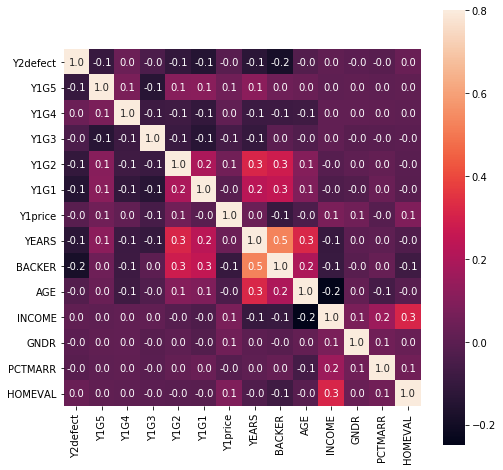

In [1719]:
# correlation plot

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [1720]:
df.mean() # checking all means

Y2defect      0.495977
Y1G5          0.340039
Y1G4          0.519794
Y1G3          0.626489
Y1G2          0.294657
Y1G1          0.480528
Y1price      19.942066
YEARS         6.371580
BACKER        0.480367
AGE          61.121017
INCOME        2.939170
GNDR          0.460734
PCTMARR      58.686514
HOMEVAL     110.402800
dtype: float64

C:\Users\jasmi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C3C44908>,
      dtype=object)

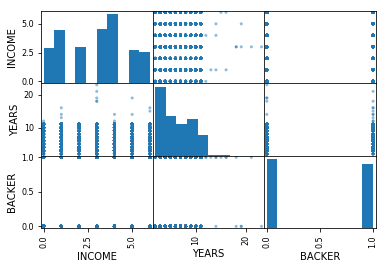

In [1721]:
plotting.scatter_matrix(df[['INCOME','YEARS','BACKER']]) # created a scatter plot betweeen income, years, and backers

(array([0.18908915, 0.28376784, 0.        , 0.19096663, 0.        ,
        0.29020491, 0.36744984, 0.        , 0.1786289 , 0.16655938]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

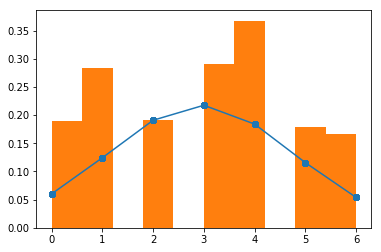

In [1722]:
# an illustration of normal distribution

j = sorted(df['INCOME'])
fit = stats.norm.pdf(j, np.mean(j), np.std(j))  #this is a fitting indeed
plt.plot(j,fit,'-o')
plt.hist(j,normed=True)      #use this to draw histogram of your data

(array([1.66214539e-01, 9.51001579e-02, 7.49459745e-02, 8.91228715e-02,
        4.98107193e-02, 3.06527503e-04, 2.29895627e-04, 1.53263752e-04,
        1.53263752e-04, 1.53263752e-04]),
 array([ 2. ,  4.1,  6.2,  8.3, 10.4, 12.5, 14.6, 16.7, 18.8, 20.9, 23. ]),
 <a list of 10 Patch objects>)

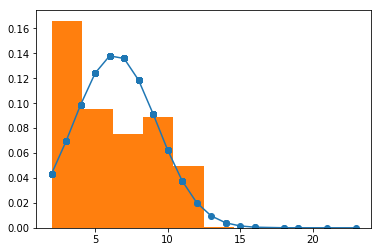

In [1723]:
# an illustration of normal distribution

j = sorted(df['YEARS'])
fit = stats.norm.pdf(j, np.mean(j), np.std(j))  #this is a fitting indeed
plt.plot(j,fit,'-o')
plt.hist(j,normed=True)      #use this to draw histogram of your data

In [1724]:
# test if the data is normally distributed

import scipy.stats as stats

print stats.normaltest(df['INCOME'])
print stats.normaltest(df['YEARS'])

NormaltestResult(statistic=1950.568342489406, pvalue=0.0)
NormaltestResult(statistic=654.9820088906623, pvalue=5.921938548541938e-143)


In [1725]:
inc = stats.normaltest(df['INCOME']) # developing chi-square
yrs = stats.normaltest(df['YEARS'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % inc
print "The chi-square statistic is %.3f and the p-value is %.3f." % yrs

The chi-square statistic is 1950.568 and the p-value is 0.000.
The chi-square statistic is 654.982 and the p-value is 0.000.


In [1726]:
print stats.normaltest(df['HOMEVAL']) # using normal test

NormaltestResult(statistic=2945.2591210857972, pvalue=0.0)


(array([1802., 2669.,  814.,  386.,  215.,  142.,   73.,   48.,   36.,
          29.]),
 array([  0. ,  59.3, 118.6, 177.9, 237.2, 296.5, 355.8, 415.1, 474.4,
        533.7, 593. ]),
 <a list of 10 Patch objects>)

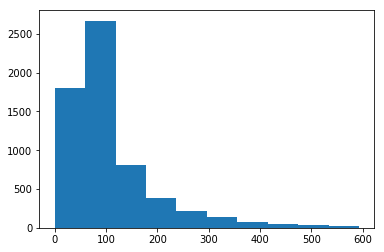

In [1727]:
plt.hist(df['HOMEVAL']) # displaying histogram of homeval

(array([4.89022503e-03, 7.24306915e-03, 2.20901397e-03, 1.04751768e-03,
        5.83461921e-04, 3.85356246e-04, 1.98105676e-04, 1.30261266e-04,
        9.76959496e-05, 7.86995149e-05]),
 array([  0. ,  59.3, 118.6, 177.9, 237.2, 296.5, 355.8, 415.1, 474.4,
        533.7, 593. ]),
 <a list of 10 Patch objects>)

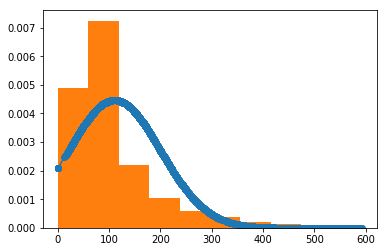

In [1728]:
j = sorted(df['HOMEVAL']) # plotting homeval
fit = stats.norm.pdf(j, np.mean(j), np.std(j))  #this is a fitting indeed
plt.plot(j,fit,'-o')
plt.hist(j,normed=True)   

In [1729]:
#print three decimal points
two_sample = stats.ttest_ind(defect, stay)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -0.905 and the p-value is 0.366.


In [1730]:
defect = df[df['Y2defect'] == 1]['Y1price'] # creating and displaying t-stat
stay = df[df['Y2defect'] == 0]['Y1price']
stats.ttest_ind(defect, stay)
#print three decimal points
two_sample = stats.ttest_ind(defect, stay)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -0.905 and the p-value is 0.366.


In [1731]:
i0 = df[df['INCOME'] == 0]['Y2defect'] # ONE- WAY ANOVA testing
i1 = df[df['INCOME'] == 1]['Y2defect']
i2 = df[df['INCOME'] == 2]['Y2defect']
i3 = df[df['INCOME'] == 3]['Y2defect']
i4 = df[df['INCOME'] == 4]['Y2defect']
i5 = df[df['INCOME'] == 5]['Y2defect']
i6 = df[df['INCOME'] == 6]['Y2defect']

f_val, p_val = stats.f_oneway(i0, i1, i2, i3, i4, i5, i6)  
  
print "One-way ANOVA P =", p_val 

One-way ANOVA P = 0.8828589062983678


In [1732]:
# ANOVA test using the python package "statsmodels"
# If this package is not installed in your machine, do "conda install statsmodels" in command prompt (Win) / terminal (Mac)
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Y2defect ~ INCOME', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod)
print aov_table

              df       sum_sq   mean_sq         F   PR(>F)
INCOME       1.0     0.205253  0.205253  0.820909  0.36495
Residual  6212.0  1553.194168  0.250031       NaN      NaN


In [1733]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd # using the pairwise function

print pairwise_tukeyhsd(df['Y2defect'], df['INCOME'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.0177  -0.0894 0.054  False 
  0      2    -0.0133  -0.0917 0.0651 False 
  0      3     0.0095  -0.0619 0.0809 False 
  0      4    -0.0015  -0.0699 0.0669 False 
  0      5     0.0051  -0.0746 0.0848 False 
  0      6     0.0078  -0.0734 0.0889 False 
  1      2     0.0044  -0.0671 0.0759 False 
  1      3     0.0272  -0.0365 0.091  False 
  1      4     0.0162  -0.0442 0.0766 False 
  1      5     0.0229  -0.0501 0.0958 False 
  1      6     0.0255  -0.0491 0.1001 False 
  2      3     0.0228  -0.0483 0.094  False 
  2      4     0.0118  -0.0564  0.08  False 
  2      5     0.0185  -0.0611 0.098  False 
  2      6     0.0211  -0.0599 0.1021 False 
  3      4     -0.011   -0.071 0.049  False 
  3      5    -0.0044   -0.077 0.0683 False 
  3      6    -0.0018   -0.076 0.0725 False 
  4      5     0.0067   -0.063 0.0763 False 
  4 

In [1734]:
df.info() # checking data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      6214 non-null object
Y2defect    6214 non-null int64
Y1G5        6214 non-null int64
Y1G4        6214 non-null int64
Y1G3        6214 non-null int64
Y1G2        6214 non-null int64
Y1G1        6214 non-null int64
Y1price     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null int32
INCOME      6214 non-null int32
GNDR        6214 non-null int32
PCTMARR     6214 non-null int64
HOMEVAL     6214 non-null int64
dtypes: int32(3), int64(11), object(1)
memory usage: 863.9+ KB


## Extra Model building

## SelectKBest

In [1735]:
X_new = SelectKBest(chi2, k=3).fit_transform(X,y) # beginng SelectKBest
print X_new

[[0 1 1]
 [1 0 1]
 [1 0 1]
 ...
 [1 0 0]
 [1 0 1]
 [0 0 1]]


In [1736]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5924932975871313
--------------------------------------------------------
[[725 212]
 [548 380]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.57      0.77      0.66       937
          1       0.64      0.41      0.50       928

avg / total       0.61      0.59      0.58      1865

--------------------------------------------------------
0.591614378243109


## Logistic Regression

In [1737]:
# develop logistic regression model with X_new (only three predictors or independent variables)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.5806970509383378
[[562 375]
 [407 521]]
             precision    recall  f1-score   support

          0       0.58      0.60      0.59       937
          1       0.58      0.56      0.57       928

avg / total       0.58      0.58      0.58      1865

0.5806044833106392


## Recursive Feature Selection

In [1738]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True]
[1 2 1 1 1]


In [1739]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Y1G5,1
1,Y1G4,2
2,Y1G3,1
3,Y1G2,1
4,Y1G1,1


In [1740]:
# another method
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, u'Y1G1'), (1, u'Y1G2'), (1, u'Y1G3'), (1, u'Y1G5'), (2, u'Y1G4')]


In [1741]:
#here I select 4 most significant features only (including Age)
X_logistic = df[['BACKER', 'Y1G1', 'Y1G3', 'Y1G5']]
print X_logistic.head()

   BACKER  Y1G1  Y1G3  Y1G5
0       1     1     1     0
2       1     1     0     1
3       0     1     1     1
4       0     0     1     0
5       0     0     1     0


In [1742]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.5812332439678284
[[542 395]
 [386 542]]
             precision    recall  f1-score   support

          0       0.58      0.58      0.58       937
          1       0.58      0.58      0.58       928

avg / total       0.58      0.58      0.58      1865

0.5812467798918044


## Storytelling

#### Results from testing

My results seem very inconclusive, I can visibly see some trends but I could not come to a conclusion as to why ticket holders may defect or not. My accuracy for predicting defects is correct 60% of the time. It seems like a lot of the data I used had no effective trends, a lot of the time the difference between defecting and buying the next season held the same graphical information.

#### Managerial Implications:

Managers could evaluate ticket buyers better to view who is more at risk to not buy season tickets next year. The most important variables I found were; BACKER, Y1G1, Y1G3, Y1G5. They are important because the heavier correlations between being a backer and the game attendance to people not renewing their tickets. Characteristics of people likely to defect are newer season ticket holders, lower than average income, and not a member of the teams "Backer" club.

#### Technical Implications:

##### i) What kind of additional data (X or independent variables) would you need to build a better classification model?

Teams ending record, Home game outcome(i.e. Win Loss), Year by year price difference.

##### ii) Any suggestions to build a better classification model?

Maybe involve more information as to the opponents played in the games attended and state if it was a winning season or a winning game, this will give better insight on if the ticket holders are more likely to stay based on the teams performance that season.